<a href="https://colab.research.google.com/github/tomasturbo/MLBI/blob/master/Ejercicio_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab import files
files.upload()

Saving dataset2.csv to dataset2.csv


{'dataset2.csv': b'x,y,condition\r\n7391.7086699559295,5898348.062879158,1\r\n48438.98425220631,5946210.417665697,1\r\n-2768.5922157477034,5946243.481186266,1\r\n41644.498119060125,5915993.173377281,1\r\n53467.799847680406,5953068.035331903,1\r\n27498.050259855372,5920301.425629703,1\r\n-27726.875556510087,5915808.297404685,1\r\n20945.954973370943,5891589.327349873,1\r\n4193.474942903995,5951444.352770353,1\r\n-5279.9270813692565,5925760.7688129395,1\r\n73192.64481679013,5940565.116994287,1\r\n-733.0367498109699,5960044.800148301,1\r\n43366.14451524173,5911476.929040237,1\r\n-7097.866105603243,5916422.779544079,1\r\n46273.27606292398,5948464.431666944,1\r\n20243.184649549105,5898367.070582676,1\r\n37491.524608397565,5930780.137080137,1\r\n58174.225190423254,5907565.613245511,1\r\n4526.910975552775,5955550.550725855,1\r\n-30592.65985844565,5918056.1436587395,1\r\n-24191.620751533075,5949441.734115396,1\r\n-15429.485916029706,5956820.100245356,1\r\n47461.470704570034,5935422.45024488,1\r

In [5]:
import tensorflow as tf
import pandas as pd
import numpy as np
df = pd.read_csv('dataset2.csv')
df.head()

,x,y,condition
0,7391.708670,5.898348e+06,1
1,48438.984252,5.946210e+06,1
2,-2768.592216,5.946243e+06,1
3,41644.498119,5.915993e+06,1
4,53467.799848,5.953068e+06,1


In [0]:
y = df.condition
df=df.drop('condition',axis=1)

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.values, y, test_size=0.20, random_state=42)

In [0]:
from tensorflow.keras.layers import Input, Dense, Activation,Dropout
from tensorflow.keras.models import Model

In [0]:
input_layer = Input(shape=(df.shape[1],))
dense_layer_1 = Dense(15, activation='relu')(input_layer)
dense_layer_2 = Dense(10, activation='relu')(dense_layer_1)
output = Dense(1, activation='sigmoid')(dense_layer_2)

model = Model(inputs=input_layer, outputs=output)
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])

In [10]:
print(model.summary())

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 2)]               0         
_________________________________________________________________
dense (Dense)                (None, 15)                45        
_________________________________________________________________
dense_1 (Dense)              (None, 10)                160       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 11        
Total params: 216
Trainable params: 216
Non-trainable params: 0
_________________________________________________________________
None


In [11]:
y_train = np.asarray(y_train)
history = model.fit(X_train, y_train, batch_size=64, epochs=100, verbose=1, validation_data=(X_test, y_test))

Epoch 1/100
1021/1021 [==============================] - 1s 1ms/step - loss: 27610.4395 - acc: 0.6927 - val_loss: 1968.8556 - val_acc: 0.8055
Epoch 2/100
1021/1021 [==============================] - 1s 1ms/step - loss: 1771.7662 - acc: 0.6833 - val_loss: 970.4606 - val_acc: 0.8055
Epoch 3/100
1021/1021 [==============================] - 1s 1ms/step - loss: 1662.6427 - acc: 0.6884 - val_loss: 1761.3710 - val_acc: 0.8055
Epoch 4/100
1021/1021 [==============================] - 1s 1ms/step - loss: 1845.6023 - acc: 0.6876 - val_loss: 2664.1089 - val_acc: 0.8055
Epoch 5/100
1021/1021 [==============================] - 1s 1ms/step - loss: 1549.5345 - acc: 0.6856 - val_loss: 5012.8740 - val_acc: 0.8055
Epoch 6/100
1021/1021 [==============================] - 1s 1ms/step - loss: 1832.7969 - acc: 0.6882 - val_loss: 277.8616 - val_acc: 0.7989
Epoch 7/100
1021/1021 [==============================] - 1s 1ms/step - loss: 1690.9242 - acc: 0.6867 - val_loss: 339.0582 - val_acc: 0.7764
Epoch 8/100
102

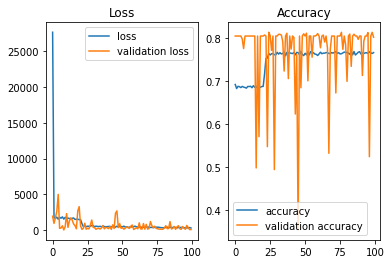

In [12]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 2)

ax[0].plot(history.history['loss'], label='loss')
ax[0].plot(history.history['val_loss'], label='validation loss')
ax[0].set_title('Loss')

ax[1].plot(history.history['acc'], label='accuracy')
ax[1].plot(history.history['val_acc'], label='validation accuracy')
ax[1].set_title('Accuracy')

ax[0].legend()
ax[1].legend();

In [13]:
score = model.evaluate(X_test, y_test, verbose=1)

print("Test Score:", score[0])
print("Test Accuracy:", score[1])

511/511 [==============================] - 0s 823us/step - loss: 109.7040 - acc: 0.8028
Test Score: 109.70402526855469
Test Accuracy: 0.8027556538581848
